In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
type(np.random.rand(1))

numpy.ndarray

In [7]:
type(np.random.rand())

float

In [21]:
class Bandit:
    p = 0.5
    p_hat = 0
    N = 0
    def pull():
        if np.random.rand() < Bandit.p:
            return 1
        else:
            return 0
    def update(x):
        Bandit.N += 1
        Bandit.p_hat += (x - Bandit.p_hat) / Bandit.N
        return Bandit.p_hat
        

In [55]:
class Bandit:
  def __init__(self, p): #class constructor always goes first, self is crucial in all class methods
    # p: the win rate
    self.p = p
    self.p_estimate = 0
    self.N = 0

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p #easier than if else

  def update(self, x): #changes on self attributes do not need a return
    self.N = self.N + 1
    self.p_estimate = self.p_estimate + (x - self.p_estimate) / self.N

In [47]:
slot = Bandit(0.5)

In [48]:
slot.p_estimate

0

In [49]:
slot.N

0

In [52]:
slot.update(slot.pull())

In [53]:
slot.p_estimate

0.5

In [54]:
slot.N

2

In [57]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [60]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

rewards = np.zeros(NUM_TRIALS)
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_j = np.argmax([b.p for b in bandits])
print("optimal j:", optimal_j)

optimal j: 2


In [58]:
help(np.argmax)

Help on _ArrayFunctionDispatcher in module numpy:

argmax(a, axis=None, out=None, *, keepdims=<no value>)
    Returns the indices of the maximum values along an axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast correctly against the array.

        .. versionadded:: 1.22.0

    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as ``a.shape``
        with the dimension along `axis` removed. If `keepdims` is set to True,
     

In [69]:
for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.choice(3)
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

In [68]:
type(np.random.choice(3))

int

In [71]:
a = np.array([True, True, False])
a.sum()

np.int64(2)

In [73]:
 # print mean estimates for each bandit
for b in bandits:
    print("mean estimate:", b.p_estimate)

mean estimate: 0.20612813370473537
mean estimate: 0.48767123287671227
mean estimate: 0.7452565761103952


In [74]:
# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num times selected optimal bandit:", num_optimal)

total reward earned: 7165.0
overall win rate: 0.7165
num_times_explored: 1044
num_times_exploited: 8956
num times selected optimal bandit: 9276


In [78]:
EPS * sum(BANDIT_PROBABILITIES) / 3 + (1-EPS) * max(BANDIT_PROBABILITIES)

0.7233333333333334

In [79]:
help(np.cumsum)

Help on _ArrayFunctionDispatcher in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-type

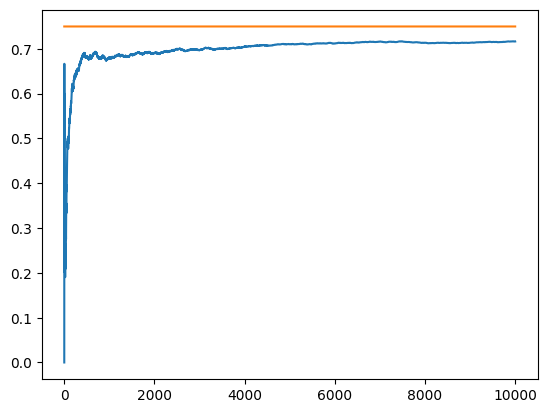

In [84]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show()

In [81]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, device=None, like=None)

    Return evenly spaced values within a given interval.

    ``arange`` can be called with a varying number of positional arguments:

    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.

    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.

    When using a non-integer step, such as 0.1, it is often better to use
    `numpy.linspace`.

    See the Warn

In [82]:
help(np.max)

Help on _ArrayFunctionDispatcher in module numpy:

max(
    a,
    axis=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>
)
    Return the maximum of an array or maximum along an axis.

    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used. If this is a tuple of ints, the maximum is selected over
        multiple axes, instead of a single axis or all the axes as before.

    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See :ref:`ufuncs-output-type` for more details.

    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast corre